# TASK-1
# PREDICTION USING SUPERVISED ML
## SUBMITTED BY: SURBHI SINGH
### Predict the percentage of an student based on the number of study hours.
### Find the score of a student who studies for 9.25 hours per day.

#### Let's first load the given dataset and look at it's shape,size and datatypes.

In [1]:
import pandas as pd
import numpy as np


In [3]:
a=pd.read_csv("http://bit.ly/w-data")
a

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### The given dataset has 2 columns namely hours and percentage and we need to predict the percentage of a student on the basis of number of hours he/she studies.

In [4]:
a.shape


(25, 2)

In [5]:
a.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [71]:
a.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Since we have no null values in the dataset, data cleaning is not required and we are good to go.

#### Lets us do some visual analysis of the data by plotting the given values

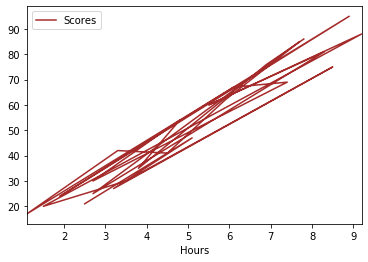

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
a.plot(x="Hours" ,y="Scores",color='brown')

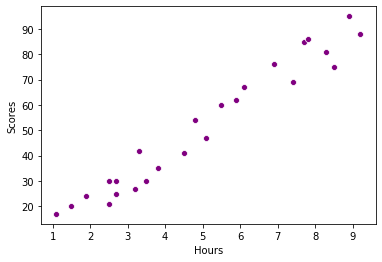

In [24]:
sns.scatterplot(x='Hours',y='Scores',data=a,color='purple')

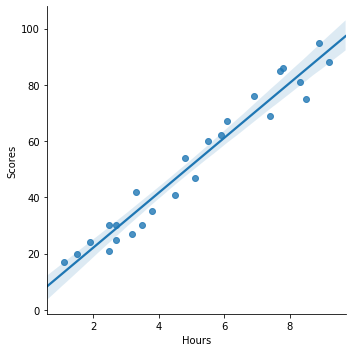

In [27]:
sns.lmplot(x='Hours',y='Scores',data=a)

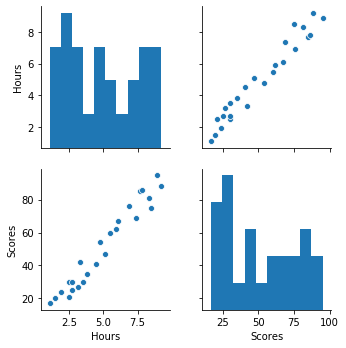

In [31]:
sns.pairplot(a)

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


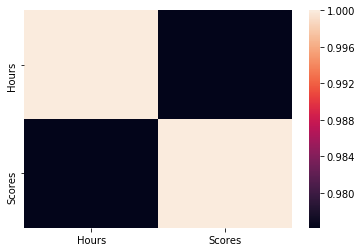

In [10]:
print(a.corr())
sns.heatmap(a.corr())

#### The hours and scores have a high postitive correlation, which clearly indicates that we must use linear regression to predict the scores.

#### Let us split the data into training and testing and formulate the model.

In [11]:
X = a.iloc[:, :-1].values    
y = a.iloc[:, 1].values

In [12]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
y_test

array([20, 27, 69, 30, 62], dtype=int64)

#### TRAINING THE DATASET:

In [13]:
from sklearn.linear_model import LinearRegression    
regressor = LinearRegression()    
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
m=regressor.coef_
c=regressor.intercept_
print("the y intercept is {} ".format(c))
print("the slope is {} ".format(m))


the y intercept is 2.018160041434683 
the slope is [9.91065648] 


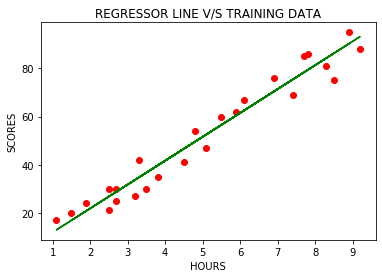

In [48]:
line = m*X+c 
plt.scatter(X, y,color='red')  
plt.plot(X, line,color='green')
plt.title('REGRESSOR LINE V/S TRAINING DATA')
plt.xlabel('HOURS')
plt.ylabel('SCORES')
plt.show()  

#### PREDICTING THE SCORES:

In [16]:
print(X_test)
y_pred = regressor.predict(X_test)
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [50]:
model = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})    
model

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### LETS PLOT THE ACTUAL SCORES AND THE PREDICTED SCORES

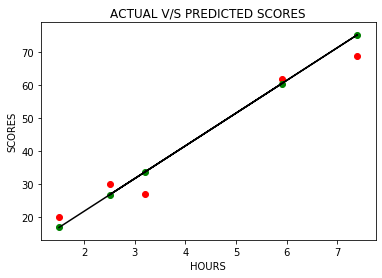

In [51]:
plt.scatter(X_test,y_test,color='red')
plt.scatter(X_test,y_pred,color='green')
line1=m*X_test+c
plt.plot(X_test,line1,color='black')
plt.title('ACTUAL V/S PREDICTED SCORES')
plt.xlabel('HOURS')
plt.ylabel('SCORES')
plt.show()

#### Let us now check the errors

In [79]:
from sklearn import metrics
print('Mean Absolute Error is', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error is', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error is', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error is 4.183859899002975
Mean Squared Error is 21.5987693072174
Root Mean Squared Error is 4.6474476121003665


#### Let us check the score for 9.25 hours

In [63]:
hours = [[9.25]]
pred = regressor.predict(hours)  
print("Number of hours = {}".format(hours))  
print("Estimated score for 9.25 hours of study = {}".format(pred[0]))  

Number of hours = [[9.25]]
Estimated score for 9.25 hours of study = 93.69173248737538


#### Now we can predict the scores of any student whose study hours is known to us in the following way:

In [ ]:
hours = [[float(input("enter no of hours\n"))]] 
pred1 = regressor.predict(hours)  
print("Number of hours = {}".format(hours))  
print("Estimated Score for {} hours is {}".format(hours,pred1[0]))

### SUBMITTED BY:SURBHI SINGH